<a href="https://colab.research.google.com/github/NadiaCarvalho/LivroPython/blob/main/MIDI_Markov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, install all needed dependencies: Musescore and Lilypond software to see musical scores and pygame to listen to midi.



In [7]:
# Instalação das Dependências
print('A instalar dependências...')

# Para ter acesso aos ficheiros midi
!git clone https://github.com/NadiaCarvalho/LivroPython.git

# Temos que instalar o Musescore e o Lilypond, software de notação musical, para
# podermos ver 
!apt-get update && apt-get install musescore lilypond

%env QT_QPA_PLATFORM=offscreen

A instalar dependências...
Cloning into 'LivroPython'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 37 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubu

In [8]:
import music21

env = music21.environment.Environment()
env['lilypondPath'] = '/usr/local/bin/lilypond'

env['pdfPath'] = '/usr/bin/musescore'
env['graphicsPath'] = '/usr/bin/musescore'

env['musicxmlPath'] = '/usr/bin/musescore'
env['musescoreDirectPNGPath'] = '/usr/bin/musescore'
env['autoDownload'] = 'allow'


*Then*, load a score.

Importar uma música em formato MIDI e converter no formato da biblioteca music21, uma Stream
Visualizar a música como partitura:




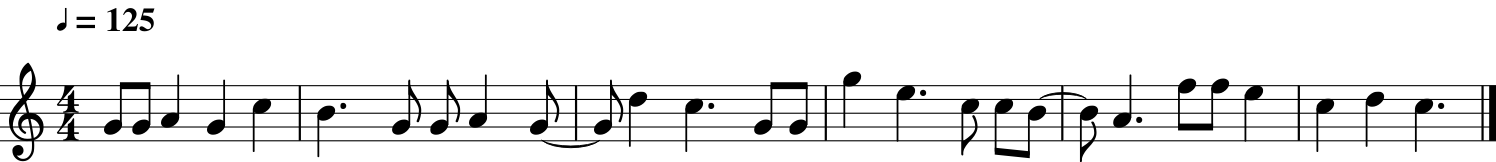



Visualizar a música como Piano Roll:




Visualizar a música como Texto:




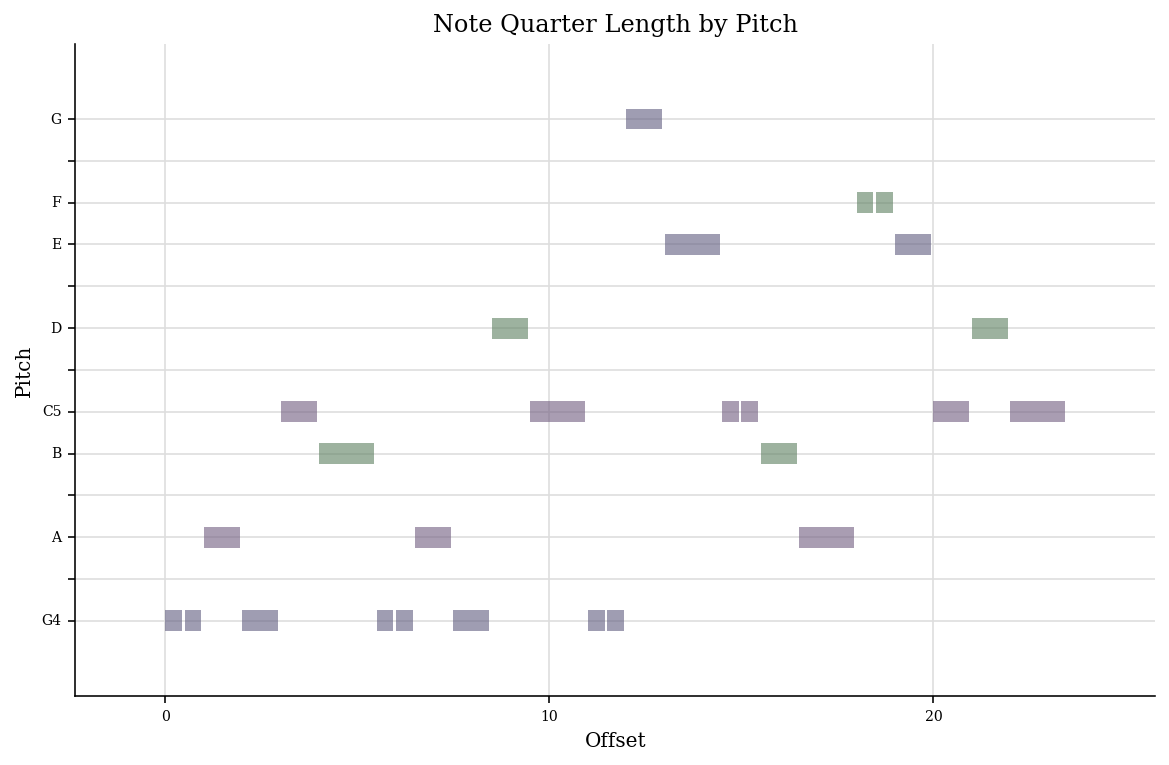

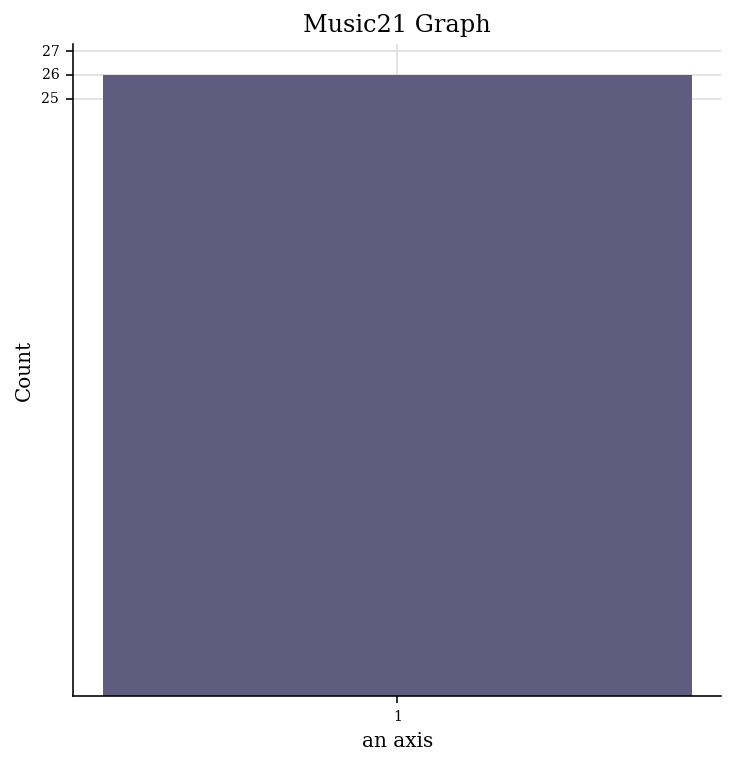

In [11]:
print('Importar uma música em formato MIDI e converter no formato da biblioteca music21, uma Stream')
musica = music21.converter.parse('./LivroPython/files/happy-birthday.mid')

print('Visualizar a música como partitura:\n\n')
musica.show()

print('\n\nVisualizar a música como Piano Roll:\n\n')
musica.plot('pianoroll')

print('\n\nVisualizar a música como Texto:\n\n')
musica.plot('text')

Get a list of pitches in the music

In [12]:
# Recuperar as notas da stream do music21 como elementos da classe nota
notes = musica.flat.notes
print(notes)

# Transformar esses elementos numa lista de strings com o nome e altura da nota
notas_originais = [note.nameWithOctave for note in notes]
print(notas_originais)

<music21.stream.iterator.StreamIterator for Score:0x7f58fa4dca90_flat @:0>
['G4', 'G4', 'A4', 'G4', 'C5', 'B4', 'G4', 'G4', 'A4', 'G4', 'D5', 'C5', 'G4', 'G4', 'G5', 'E5', 'C5', 'C5', 'B4', 'A4', 'F5', 'F5', 'E5', 'C5', 'D5', 'C5']


Now, we will create a Markov Chain from this sequence and generate new musical sequences!

In [13]:
notas_unicas = list(set(notas_originais))

# Criamos uma lista de todos os possíveis arranjos de notas duas a duas
bigramas = [note + ' ' + notas_originais[i+1] for i, note in enumerate(notas_originais[:-1])]
print(bigramas)

cadeia_de_markov = {}

for nota in notas_unicas:
  bigrams_nota = [bigram for bigram in bigramas if bigram.split(' ')[0] == nota]

  # Calculo da frequencia dos bigramas
  frequencias = {x : bigrams_nota.count(x) for x in bigrams_nota}

  # Converter frequencias em Probabilidade
  probs = {x.split(' ')[1] : frequencias[x]/len(bigrams_nota) for x in frequencias}

  cadeia_de_markov[nota] = probs

['G4 G4', 'G4 A4', 'A4 G4', 'G4 C5', 'C5 B4', 'B4 G4', 'G4 G4', 'G4 A4', 'A4 G4', 'G4 D5', 'D5 C5', 'C5 G4', 'G4 G4', 'G4 G5', 'G5 E5', 'E5 C5', 'C5 C5', 'C5 B4', 'B4 A4', 'A4 F5', 'F5 F5', 'F5 E5', 'E5 C5', 'C5 D5', 'D5 C5']


In [14]:
# Na geração, utilizamos a função de previsao_prox_estado a cada iteração da nova sequencia
import numpy

num_notas = 10

# Geramos uma nota inicial aleatoria das existentes na musica
nota = numpy.random.choice(notas_originais) 

sequencia_gerada = [nota]
for n in range(num_notas):
  opcoes = list(cadeia_de_markov[nota].keys())
  probabilidades = list(cadeia_de_markov[nota].values())
  nova_nota = numpy.random.choice(opcoes, p=probabilidades)

  sequencia_gerada.append(nova_nota)
  nota = nova_nota

print(sequencia_gerada)

['A4', 'F5', 'E5', 'C5', 'D5', 'C5', 'C5', 'B4', 'A4', 'G4', 'G4']


The sequence generated is a string with pitches and durations. We need to convert it into a music21 stream to see it as a score. 

Visualizar a nova música como partitura:




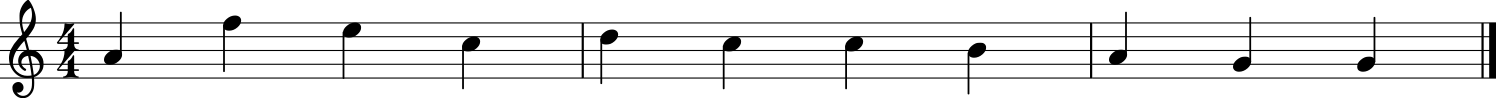



Visualizar a música como Piano Roll:




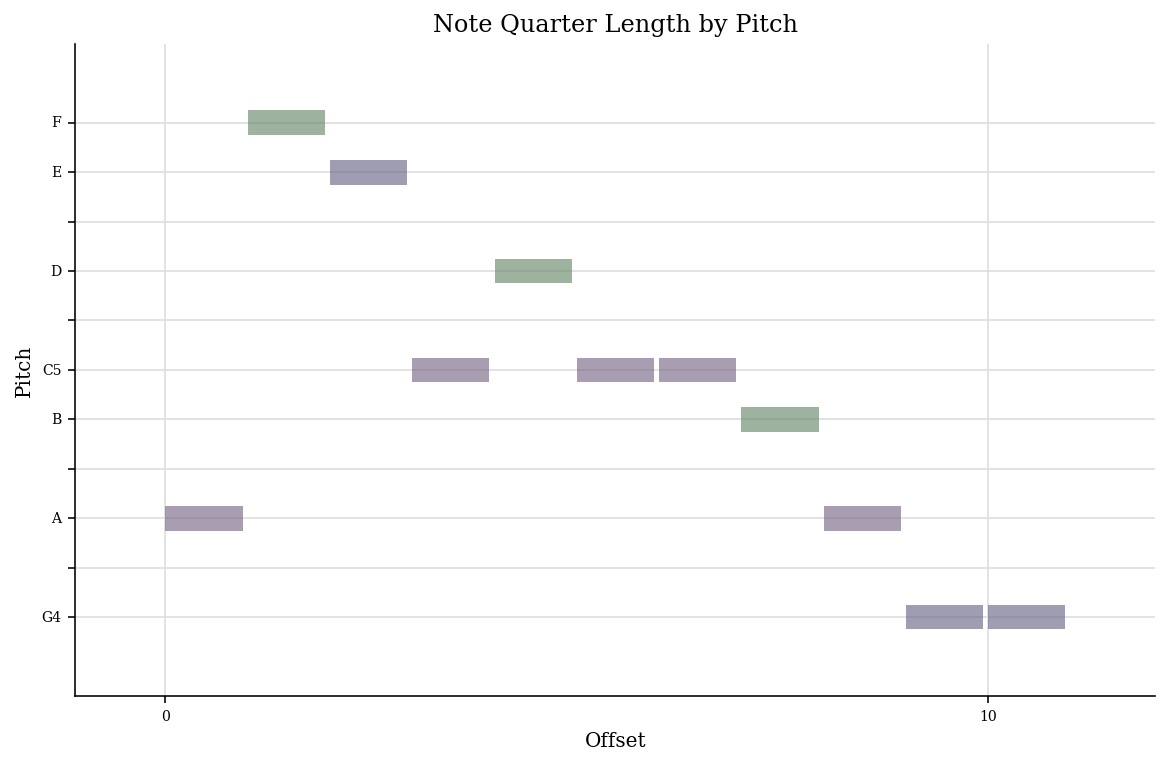

In [15]:
# Transform Pitch Sequence into music21 Stream

nova_musica = music21.stream.Stream()

for nota in sequencia_gerada:
  # create new note and append it to the stream
  nova_nota = music21.note.Note(nota)
  nova_musica.append(nova_nota)

print('Visualizar a nova música como partitura:\n\n')
nova_musica.show()

print('\n\nVisualizar a música como Piano Roll:\n\n')
nova_musica.plot('pianoroll')